# **Watching lynx over the years**

Goal: ensure the quality of the dataset.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

pd.set_option('display.max_colwidth', None)

## **Load csv and convert date column**

In [3]:
df = pd.read_csv(Path("/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv"))

/tmp/xpython_2051678/2268921472.py:1: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path("/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv"))


In [4]:
print(df.lynx_id.tolist()[:50])

['van-gogh_FR', 'van-gogh_FR', 'van-gogh_FR', 'van-gogh_FR', 'van-gogh_FR', 'van-gogh_FR', 'van-gogh_FR', 'jess_FR', 'jess_FR', 'jess_FR', 'jess_FR', 'jess_FR', 'jess_FR', '601_FR', '601_FR', 'dielen_FR', 'dielen_FR', 'dett_FR', 'dett_FR', '439_FR', '439_FR', '439_FR', '439_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'leki_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR', 'minus_FR']


In [5]:
def convert_date(date_str, country):
    if country == 'France':
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')
    else:
        return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [6]:
df['date'] = df.apply(lambda row: convert_date(row['date'], row['country']), axis=1)

In [7]:
df.head()[['filepath', 'lynx_id', 'date', 'country']]

,filepath,lynx_id,date,country
0,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-04-27_NA_5.JPG,van-gogh_FR,2012-04-27,France
1,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-05-05_NA_1.JPG,van-gogh_FR,2012-05-05,France
2,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-17_NA_3.JPG,van-gogh_FR,2012-03-17,France
3,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-16_NA_6.JPG,van-gogh_FR,2012-03-16,France
4,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/france/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Van-Gogh/Van-Gogh_OCS_NA_2012-03-05_NA_7.JPG,van-gogh_FR,2012-03-05,France


## **Keep only rows with a date**

In [8]:
filtered_df = df[df['date'].notna()]
print(f"Only the following countries have images with dates: {filtered_df['country'].unique()}")

Only the following countries have images with dates: ['France' 'croatia' 'slovenia']


In [9]:
lynx_id_counts = filtered_df['lynx_id'].value_counts()
lynx_id_counts

lynx_id
goru_SI               455
f39-060_FR            243
draga2_SI             199
osilnica2_SI          153
teja(malagora1)_SI    109
                     ... 
enver_HR                1
šiljo_HR                1
saborsko_HR             1
andreja l17_HR          1
platak 6_HR             1
Name: count, Length: 501, dtype: int64

## **Display of a random image per year of a random lynx**

### **Get the year of the image**

In [10]:
filtered_df['year'] = filtered_df['date'].dt.year

/tmp/xpython_2051678/505010961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['date'].dt.year


In [11]:
filtered_df['year'].unique()

array([2012, 2022, 2018, 2017, 2020, 2015, 2016, 2014, 2021, 2019, 2011,
       2010, 2013, 2006, 2007, 2009, 2008, 2023], dtype=int32)

In [12]:
lynx_years = filtered_df.groupby('lynx_id')['year'].nunique()
lynx_years

lynx_id
100_FR          1
1015_FR         1
1017_FR         1
1018_FR         1
1033=l286_FR    4
               ..
zdrocle1_SI     4
zdrocle2_SI     3
zita_HR         2
zois_SI         1
šiljo_HR        1
Name: year, Length: 501, dtype: int64

### **Only lynx with at least two images in two different years are kept**

In [13]:
lynx_with_multiple_years = lynx_years[lynx_years >= 2].index
lynx_with_multiple_years

Index(['1033=l286_FR', '1079_FR', '1098_FR', '1121_FR', '1128_FR', '1185_FR',
       '1208_FR', '1224_FR', '1225_FR', '1254_FR',
       ...
       'tris_SI', 'trubaja_HR', 'unico (lbih01)_HR', 'vedran_HR', 'vilim_HR',
       'vitrenka_HR', 'zarez_HR', 'zdrocle1_SI', 'zdrocle2_SI', 'zita_HR'],
      dtype='object', name='lynx_id', length=216)

### **Select a random lynx**

In [68]:
selected_lynx_id = np.random.choice(lynx_with_multiple_years)
selected_lynx_id

'zarez_HR'

In [69]:
selected_df = filtered_df[filtered_df['lynx_id'] == selected_lynx_id]
selected_df[['filepath', 'lynx_id', 'date']]

,filepath,lynx_id,date
3368,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/4.12._novi_ris_zarez_s_desna.jpg,zarez_HR,2019-12-04 18:57:00
3369,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/4.12.2019novi_ris_zarez_desno_LIJEVA.jpg,zarez_HR,2019-12-04 18:57:00
3372,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/21.12.2019_novi_ris_zarez.jpg,zarez_HR,2019-12-21 19:08:00
3374,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/23.1.2020_novi_ris_zarez.jpg,zarez_HR,2020-01-23 15:51:00
3376,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/11.2.2020_novi_ris_zarez.jpg,zarez_HR,2020-02-11 12:16:00
3534,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/03-3-2020_Stala_neID.JPG,zarez_HR,2020-03-03 01:00:00
3536,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/02-23-2020_MrzliDol_Zarez1.JPG,zarez_HR,2020-02-23 20:28:00
3537,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/04-24-2020_MrzliDol_Zarez.JPG,zarez_HR,2020-04-24 03:18:00
3539,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/02-18-2020_Hiblerova_kuca_Zarez.JPG,zarez_HR,2020-02-18 20:09:00
3540,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/02-27-2020_Hiblerova_Zarez.JPG,zarez_HR,2020-02-27 11:14:00


### **Select one random image per year for this lynx**

In [70]:
images_per_year = selected_df.groupby('year').sample()
images_per_year

,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,country,filepath_no_bg,score_sam,number_animals,number_children,sex,side,latitude,longitude,year
3372,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/21.12.2019_novi_ris_zarez.jpg,zarez_HR,Veterinarski fakultet,NaN,2019-12-21 19:08:00,NaN,3,0.961,889.750400,258.9120,...,croatia,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/no_background_new/croatia/Zarez/no_bg_3_21.12.2019_novi_ris_zarez.jpg,0.974314,1.0,0.0,Male,right,14.96344,45.130087,2019
3544,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/03-6-2020_Hiblerova_Zarez.JPG,zarez_HR,Veterinarski fakultet,NaN,2020-03-06 12:46:00,NaN,12,0.963,0.000000,714.8352,...,croatia,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/no_background_new/croatia/Zarez/no_bg_12_03-6-2020_Hiblerova_Zarez.JPG,0.981829,1.0,0.0,Male,right,14.96344,45.130087,2020
3730,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I__00089.JPG,zarez_HR,Veterinarski fakultet,NaN,2021-02-06 22:21:00,NaN,24,0.960,3.997952,0.0000,...,croatia,/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/no_background_new/croatia/Zarez/no_bg_24_I__00089.JPG,0.976957,1.0,0.0,Male,right,14.96344,45.130087,2021


### **Plot**

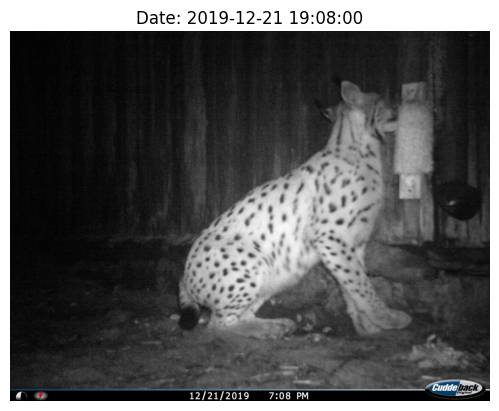

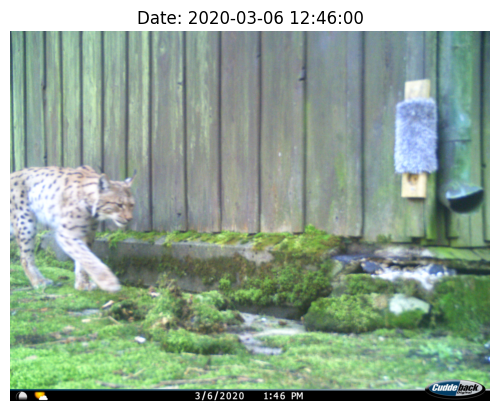

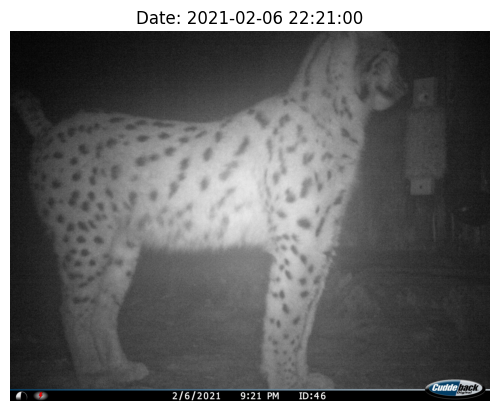

Lynx selected: zarez_HR


In [71]:
for _, row in images_per_year.iterrows():
    filepath = row['filepath']
    date = row['date']
    
    img = Image.open(filepath)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Date: {date.strftime("%Y-%m-%d %H:%M:%S")}')
    plt.show()

print(f"Lynx selected: {selected_lynx_id}")